In [1]:
import pandas as pd
import re
import networkx as nx
import seaborn as sns
import random
import matplotlib.pyplot as plt


In [2]:
# read data
data=pd.read_csv(r'C:\Users\p_uli\Desktop\Columbia University\Cursos\Fall 22\Capstone\Data\data_uniques.csv')


In [3]:
data.head()

,message_id,date,from,to,subject,cc,bcc,body
0,allen-p\all_documents\1,"Wed, 13 Dec 2000 18:41:00 -0800 (PST)",1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,"December 14, 2000 - Bear Stearns' predictions ...",NaN,NaN,In today's Daily Update you'll find free repor...
1,allen-p\all_documents\10,"Wed, 13 Dec 2000 08:35:00 -0800 (PST)",messenger@ecm.bloomberg.com,NaN,Bloomberg Power Lines Report,NaN,NaN,Here is today's copy of Bloomberg Power Lines....
2,allen-p\all_documents\100,"Mon, 9 Oct 2000 07:16:00 -0700 (PDT)",phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,NaN,NaN,---------------------- Forwarded by Phillip K ...
3,allen-p\all_documents\101,"Mon, 9 Oct 2000 07:00:00 -0700 (PDT)",phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,NaN,NaN,---------------------- Forwarded by Phillip K ...
4,allen-p\all_documents\102,"Thu, 5 Oct 2000 06:26:00 -0700 (PDT)",phillip.allen@enron.com,david.delainey@enron.com,NaN,NaN,NaN,"Dave, \n\n Here are the names of the west desk..."


In [4]:
# Unique users
data['user']=data['message_id'].apply(lambda x: x[0:x.find('\\')] )


In [5]:

def get_domain(x):
    try:
        x=x[(x.find('@')+1):]
        return re.sub("[^A-Za-z.]","",x)
    except:
        return 
    
def split_to(x):
    try:
        return x.split(',')
    except:
        return x


In [6]:
# In degree and outdegree of each user by domain
data['from_domain']=data['from'].apply(lambda x: get_domain(x))
# top 10 of users sending/receiving emails
print('top 10 of users sending/receiving emails')
data['user'].value_counts()[:10]

top 10 of users sending/receiving emails


dasovich-j      15809
kaminski-v      11277
jones-t         10120
shackleton-s     9243
mann-k           7469
taylor-m         6437
nemec-g          5763
germany-c        5530
kean-s           5226
farmer-d         5066
Name: user, dtype: int64

In [7]:
data.head()

,message_id,date,from,to,subject,cc,bcc,body,user,from_domain
0,allen-p\all_documents\1,"Wed, 13 Dec 2000 18:41:00 -0800 (PST)",1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,"December 14, 2000 - Bear Stearns' predictions ...",NaN,NaN,In today's Daily Update you'll find free repor...,allen-p,multexinvestornetwork.com
1,allen-p\all_documents\10,"Wed, 13 Dec 2000 08:35:00 -0800 (PST)",messenger@ecm.bloomberg.com,NaN,Bloomberg Power Lines Report,NaN,NaN,Here is today's copy of Bloomberg Power Lines....,allen-p,ecm.bloomberg.com
2,allen-p\all_documents\100,"Mon, 9 Oct 2000 07:16:00 -0700 (PDT)",phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,NaN,NaN,---------------------- Forwarded by Phillip K ...,allen-p,enron.com
3,allen-p\all_documents\101,"Mon, 9 Oct 2000 07:00:00 -0700 (PDT)",phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,NaN,NaN,---------------------- Forwarded by Phillip K ...,allen-p,enron.com
4,allen-p\all_documents\102,"Thu, 5 Oct 2000 06:26:00 -0700 (PDT)",phillip.allen@enron.com,david.delainey@enron.com,NaN,NaN,NaN,"Dave, \n\n Here are the names of the west desk...",allen-p,enron.com


In [85]:
# data graph. We split the mails in 'to' has they might contain different domains
graph_data=data[['user','from_domain','to']]
graph_data['to']=graph_data['to'].apply(lambda x: split_to(x))
graph_data=graph_data.explode('to')
graph_data['to_domain']=graph_data['to'].apply(lambda x: get_domain(x))
graph_data.drop_duplicates(inplace=True)



C:\Users\p_uli\AppData\Local\Temp\ipykernel_10016\1396477036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_data['to']=graph_data['to'].apply(lambda x: split_to(x))


In [86]:
print('top 10 users with most emails')
data[['user']].value_counts()[:10]

top 10 users with most emails


user        
dasovich-j      15809
kaminski-v      11277
jones-t         10120
shackleton-s     9243
mann-k           7469
taylor-m         6437
nemec-g          5763
germany-c        5530
kean-s           5226
farmer-d         5066
dtype: int64

In [41]:
print('users with least emails')
data[['user']].value_counts()[-10:]

users with least emails


user      
king-j        215
ring-a        215
townsend-j    211
dickson-s     199
sanchez-m     178
quenet-j      169
slinger-r     120
south-s        57
phanis-s       26
merriss-s      14
dtype: int64

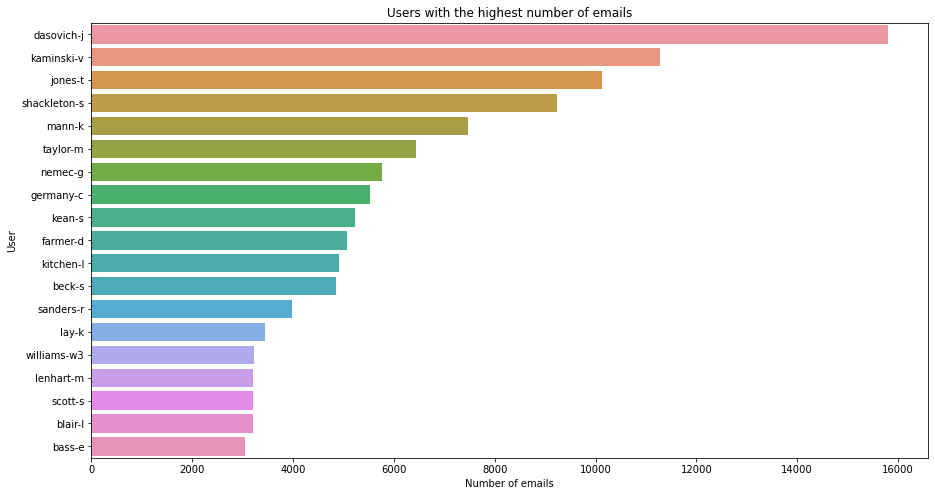

In [78]:
# plot number of emails per user
plt.figure(1, figsize=(15, 8))
aux_users=data['user'].value_counts()
aux_users=aux_users[aux_users>3000]
sns.barplot(y=list(aux_users.index),x=aux_users,orient='h');
plt.title('Users with the highest number of emails');
plt.xlabel('Number of emails');
plt.ylabel('User');



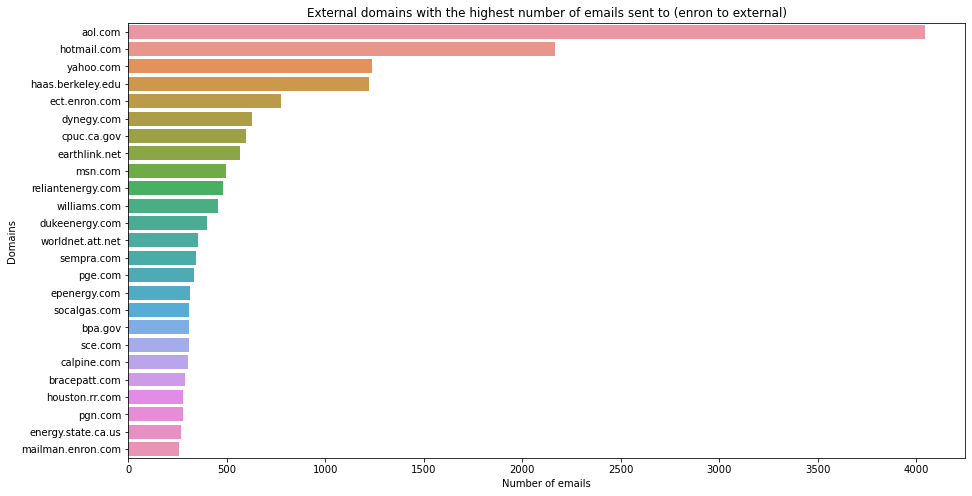

In [106]:
# number of emails received (using variable 'to_domain')
plt.figure(1, figsize=(15, 8))
aux_domain=graph_data['to_domain'].value_counts()
aux_domain=aux_domain[aux_domain>250]
aux_domain.drop('enron.com',inplace=True)
sns.barplot(y=list(aux_domain.index),x=aux_domain,orient='h');
plt.title('External domains with the highest number of emails sent to (enron to external)');
plt.xlabel('Number of emails');
plt.ylabel('Domains');

In [100]:
# top domains who received emails from ENRON personel in table
aux=graph_data['to_domain'].value_counts()
list_tos=aux[aux>500].index
print('Top 10 receivers from Enron')
aux.head(11)

Top 10 receivers from Enron


enron.com            148466
aol.com                4045
hotmail.com            2168
yahoo.com              1237
haas.berkeley.edu      1220
ect.enron.com           777
dynegy.com              626
cpuc.ca.gov             596
earthlink.net           568
msn.com                 494
reliantenergy.com       479
Name: to_domain, dtype: int64

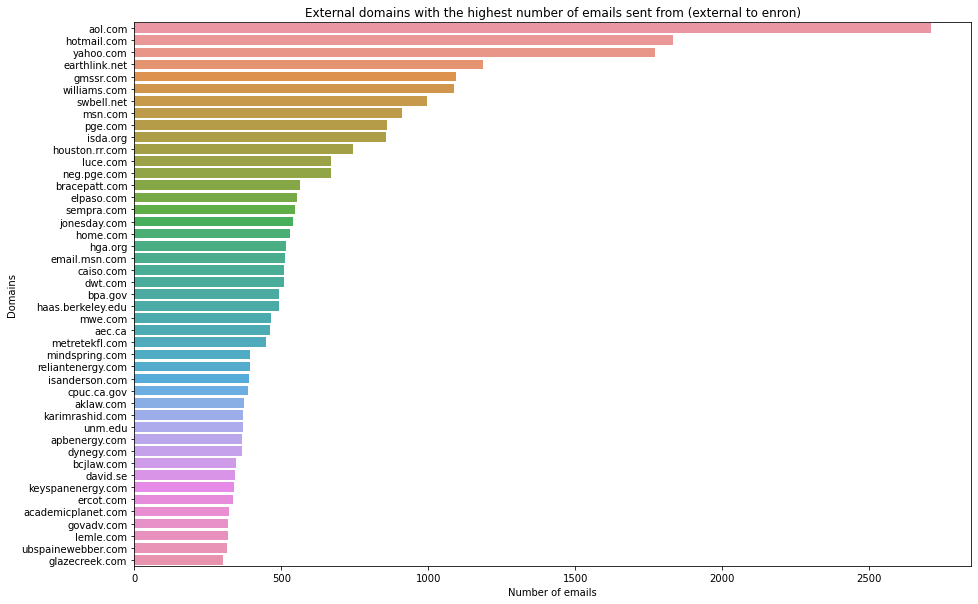

In [107]:
plt.figure(1, figsize=(15, 10))
aux_from=graph_data['from_domain'].value_counts()
aux_from=aux_from[aux_from>300]
aux_from.drop('enron.com',inplace=True)
sns.barplot(y=list(aux_from.index),x=aux_from,orient='h');
plt.title('External domains with the highest number of emails sent from (external to enron)');
plt.xlabel('Number of emails');
plt.ylabel('Domains');

In [109]:
# the same but in table
graph_data['from_domain'].value_counts()[:11]

enron.com        132114
aol.com            2712
hotmail.com        1834
yahoo.com          1772
earthlink.net      1185
gmssr.com          1093
williams.com       1088
swbell.net          996
msn.com             910
pge.com             860
isda.org            857
Name: from_domain, dtype: int64

In [112]:
print('top 10 combinations of the user and destination of their emails')
graph_data[['from_domain','to_domain']][graph_data['to_domain']!='enron.com'].value_counts()[:10]

top 10 combinations of the user and destination of their emails


from_domain        to_domain        
enron.com          aol.com              639
                   hotmail.com          444
aol.com            aol.com              380
hotmail.com        hotmail.com          361
haas.berkeley.edu  haas.berkeley.edu    329
enron.com          yahoo.com            307
jiss.com           haas.berkeley.edu    298
hotmail.com        aol.com              172
enron.com          pgn.com              165
williams.com       williams.com         154
dtype: int64

In [128]:
# creating the edges of the graph using from and to domains
aux_from_to=graph_data[['from_domain','to_domain']].value_counts()
aux_from_to=aux_from_to[aux_from_to>100]
edges=list(aux_from_to.index)

In [136]:
nodes=[x[0] for x in  edges]+[x[1] for x in  edges]
nodes=[*set(nodes)]
len(nodes)

69

In [137]:
# Creates the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

In [140]:
print(nx.number_connected_components(G), "connected components")

3 connected components


In [151]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
print(S[2].edges)
print(S[1].edges)

[('unm.edu', 'unm.edu')]
[('haas.berkeley.edu', 'haas.berkeley.edu'), ('haas.berkeley.edu', 'jiss.com')]


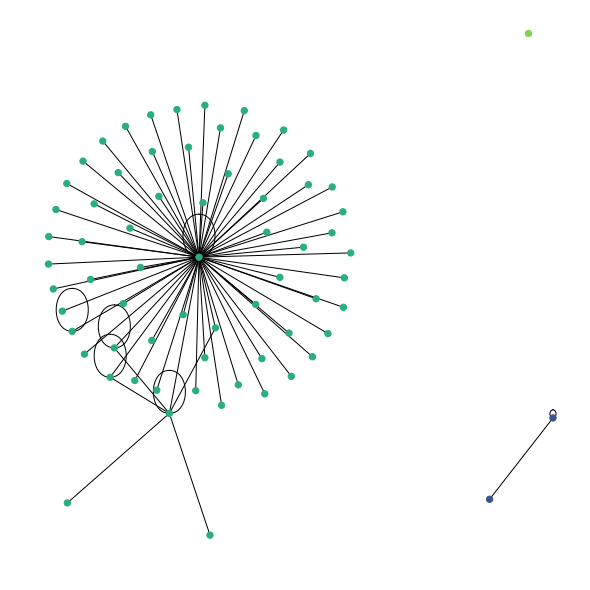

In [139]:
#nx.draw(G)
plt.figure(1, figsize=(8, 8))
# layout graphs with positions using graphviz neato
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
# color nodes the same in each connected subgraph
C = (G.subgraph(c) for c in nx.connected_components(G))
for g in C:
    c = [random.random()] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
plt.show()

In [13]:
edges= graph_data[['user','to_domain']]
edges=edges[edges['to_domain'].isin(list_tos)]
edges= edges.drop_duplicates()
edges.reset_index(inplace=True)

In [116]:
edges.shape

(1837, 3)

In [25]:
nodes=list(graph_data['user'])+list_tos.to_list()
nodes=[*set(nodes)]
len(nodes)

208

In [15]:
# Creates the graph
G = nx.Graph()

In [16]:
# adding nodes
for i in list(graph_data['user']):
    G.add_nodes_from([
    (i, {"color": "red"}),
    ])
for i in list_tos.to_list():
    G.add_nodes_from([
    (i, {"color": "green"}),
    ])


In [17]:
# add edges
for i in range(edges.shape[0]):
    G.add_edge(edges['user'][i], edges['to_domain'][i] )

In [22]:
print(nx.number_connected_components(G), "connected components")

2 connected components


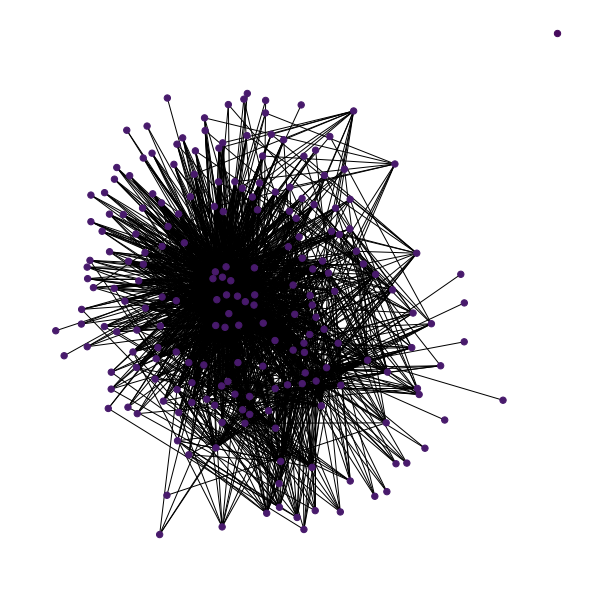

In [24]:
#nx.draw(G)
plt.figure(1, figsize=(8, 8))
# layout graphs with positions using graphviz neato
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
# color nodes the same in each connected subgraph
C = (G.subgraph(c) for c in nx.connected_components(G))
for g in C:
    c = [random.random()] * nx.number_of_nodes(g)  # random color...
    nx.draw(g, pos, node_size=40, node_color=c, vmin=0.0, vmax=1.0, with_labels=False)
plt.show()

In [21]:
nx.nx_agraph.to_agraph(G)

<AGraph <Swig Object of type 'Agraph_t *' at 0x000001540BA949C0>>